# T2: Neural IBM1 (with additional French context)

Neural IBM 1 with additional French context (Section 2.1 of the notebook)

In [68]:
# first run a few imports:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
from pprint import pprint
import pickle
from utils import smart_reader, bitext_reader
from vocabulary import OrderedCounter, Vocabulary 
from utils import iterate_minibatches, prepare_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading data

In [69]:
# the paths to our training and validation data, English side
train_e_path = 'data/training/hansards.36.2.e.gz'
train_f_path = 'data/training/hansards.36.2.f.gz'
dev_e_path = 'data/validation/dev.e.gz'
dev_f_path = 'data/validation/dev.f.gz'
dev_wa = 'data/validation/dev.wa.nonullalign'
test_e_path = 'data/test/test.e.gz'
test_f_path = 'data/test/test.f.gz'
test_wa = 'data/test/test.wa.nonullalign'

These are the vocabularies that we use further on.

In [73]:
# Using only 1000 words will result in many UNKs, but
# it will make training a lot faster. 
# If you have a fast computer, a GPU, or a lot of time,
# try with 10000 instead.
max_tokens=1000

corpus_e = smart_reader(train_e_path)    
vocabulary_e = Vocabulary(corpus=corpus_e, max_tokens=max_tokens)
pickle.dump(vocabulary_e, open("vocabulary_e.pkl", mode="wb"))

corpus_f = smart_reader(train_f_path)    
vocabulary_f = Vocabulary(corpus=corpus_f, max_tokens=max_tokens)
pickle.dump(vocabulary_f, open("vocabulary_f.pkl", mode="wb"))

## T2 model

We import the NeuralIBM1Model from T2.py and NeuralIBM1Trainer from T2trainer.py

In [125]:
from T2 import NeuralIBM1Model
from T2trainer import NeuralIBM1Trainer

##  2.1.1 Concatenation

In [ ]:
tf.reset_default_graph()


with tf.Session() as sess:

    # some hyper-parameters
    # tweak them as you wish
    batch_size=10  # on CPU, use something much smaller e.g. 1-16
    max_length=30
    lr = 0.001
    lr_decay = 0.0  # set to 0.0 when using Adam optimizer (default)
    emb_dim = 64
    mlp_dim = 128

    # our model
    model = NeuralIBM1Model(
        x_vocabulary=vocabulary_e, y_vocabulary=vocabulary_f, 
        batch_size=batch_size, emb_dim=emb_dim, mlp_dim=mlp_dim, session=sess,
        mode='concat')

    # our trainer
    trainer = NeuralIBM1Trainer(
        model, train_e_path, train_f_path, 
        dev_e_path, dev_f_path, dev_wa,
        test_e_path, test_f_path, test_wa,
        num_epochs=10, batch_size=batch_size, 
        max_length=max_length, lr=lr, lr_decay=lr_decay, session=sess,
        max_num=10000) # small training corpus just to make testing new code easier

    # now first TF needs to initialize all the variables
    print("Initializing variables..")
    sess.run(tf.global_variables_initializer())

    # now we can start training!
    print("Training started..")
    results = trainer.train()
    dev_AERs, test_AERs, train_likelihoods, dev_likelihoods = results

Tensor("Shape_3:0", shape=(3,), dtype=int32)
Training with B=10 max_length=30 lr=0.001 lr_decay=0.0
Initializing variables..
Training started..
Shuffling training data
7503
Iter   100 loss 73.490379 accuracy 0.20 lr 0.001000
Iter   200 loss 77.827408 accuracy 0.18 lr 0.001000
Iter   300 loss 67.857826 accuracy 0.19 lr 0.001000
Iter   400 loss 54.593658 accuracy 0.20 lr 0.001000
Iter   500 loss 71.602585 accuracy 0.19 lr 0.001000
Iter   600 loss 71.782303 accuracy 0.16 lr 0.001000
Iter   700 loss 57.213196 accuracy 0.23 lr 0.001000
Epoch 1 loss 63.854978 accuracy 0.20 val_aer 0.59 val_acc 0.19
Computing training-set likelihood
Computing dev-set likelihood
Model saved in file: model.ckpt
Shuffling training data
7503
Iter   100 loss 71.107162 accuracy 0.21 lr 0.001000
Iter   200 loss 67.191544 accuracy 0.16 lr 0.001000
Iter   300 loss 55.076130 accuracy 0.19 lr 0.001000
Iter   400 loss 56.359974 accuracy 0.23 lr 0.001000
Iter   500 loss 58.924011 accuracy 0.21 lr 0.001000
Iter   600 loss 

### Plots

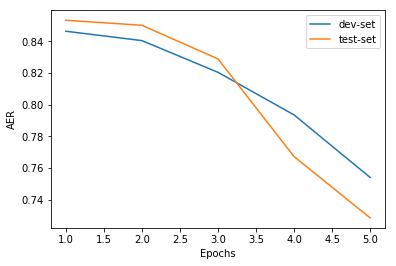

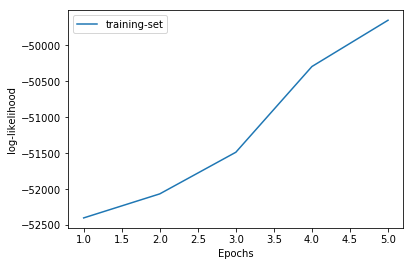

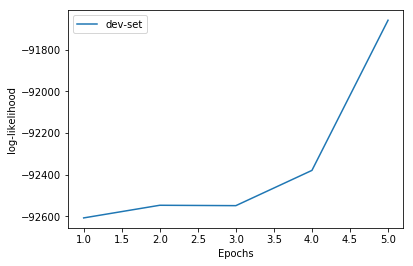

In [127]:
# plotting
import matplotlib.pyplot as plt

handles = []
ax1 = plt.plot(range(1, len(dev_AERs)+1), dev_AERs, label='dev-set')
handles.extend(ax1)
ax2 = plt.plot(range(1, len(test_AERs)+1), test_AERs, label='test-set')
handles.extend(ax2)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('AER')
plt.show()
plt.clf()

handles = []
ax1 = plt.plot(range(1, len(train_likelihoods)+1), train_likelihoods, label='training-set')
handles.extend(ax1)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('log-likelihood')
plt.show()
plt.clf()

handles = []
ax1 = plt.plot(range(1, len(dev_likelihoods)+1), dev_likelihoods, label='dev-set')
handles.extend(ax1)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('log-likelihood')
plt.show()
plt.clf()

## 2.1.2 Gate

In [60]:
tf.reset_default_graph()


with tf.Session() as sess:

    # some hyper-parameters
    # tweak them as you wish
    batch_size=10  # on CPU, use something much smaller e.g. 1-16
    max_length=30
    lr = 0.001
    lr_decay = 0.0  # set to 0.0 when using Adam optimizer (default)
    emb_dim = 64
    mlp_dim = 128

    # our model
    model = NeuralIBM1Model(
        x_vocabulary=vocabulary_e, y_vocabulary=vocabulary_f, 
        batch_size=batch_size, emb_dim=emb_dim, mlp_dim=mlp_dim, session=sess,
        mode='gate')

    # our trainer
    trainer = NeuralIBM1Trainer(
        model, train_e_path, train_f_path, 
        dev_e_path, dev_f_path, dev_wa,
        test_e_path, test_f_path, test_wa,
        num_epochs=20, batch_size=batch_size, 
        max_length=max_length, lr=lr, lr_decay=lr_decay, session=sess,
        max_num=100000) # small training corpus just to make testing new code easier

    # now first TF needs to initialize all the variables
    print("Initializing variables..")
    sess.run(tf.global_variables_initializer())


    # now we can start training!
    print("Training started..")
    results = trainer.train()
    dev_AERs, test_AERs, train_likelihoods, dev_likelihoods = results

Training with B=10 max_length=30 lr=0.001 lr_decay=0.0
Initializing variables..
Training started..
Shuffling training data
Iter   100 loss 63.408611 accuracy 0.25 lr 0.001000
Iter   200 loss 81.313805 accuracy 0.21 lr 0.001000
Iter   300 loss 59.586708 accuracy 0.23 lr 0.001000
Iter   400 loss 61.560791 accuracy 0.21 lr 0.001000
Iter   500 loss 69.746979 accuracy 0.22 lr 0.001000
Iter   600 loss 69.428780 accuracy 0.22 lr 0.001000
Iter   700 loss 41.948959 accuracy 0.22 lr 0.001000
Iter   800 loss 66.763000 accuracy 0.18 lr 0.001000
Iter   900 loss 78.009445 accuracy 0.20 lr 0.001000
Iter  1000 loss 51.330494 accuracy 0.18 lr 0.001000
Iter  1100 loss 60.015503 accuracy 0.21 lr 0.001000
Iter  1200 loss 48.276958 accuracy 0.24 lr 0.001000
Iter  1300 loss 60.710785 accuracy 0.21 lr 0.001000
Iter  1400 loss 47.947594 accuracy 0.21 lr 0.001000
Iter  1500 loss 27.583551 accuracy 0.23 lr 0.001000
Iter  1600 loss 34.077522 accuracy 0.25 lr 0.001000
Iter  1700 loss 39.243164 accuracy 0.22 lr 0.

### Plots

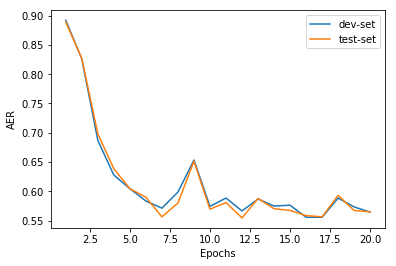

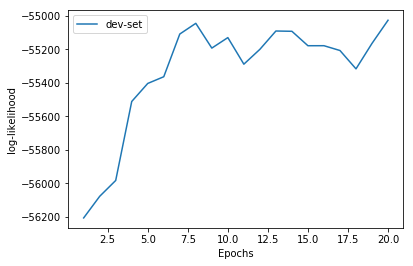

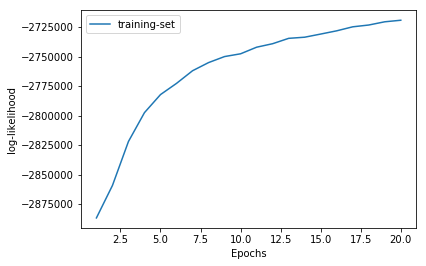

In [61]:
# results for 100k sentences
import matplotlib.pyplot as plt

handles = []
ax1 = plt.plot(range(1, len(dev_AERs)+1), dev_AERs, label='dev-set')
handles.extend(ax1)
ax2 = plt.plot(range(1, len(test_AERs)+1), test_AERs, label='test-set')
handles.extend(ax2)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('AER')
plt.show()
plt.clf()

handles = []
ax1 = plt.plot(range(1, len(dev_likelihoods)+1), dev_likelihoods, label='dev-set')
handles.extend(ax1)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('log-likelihood')
plt.show()
plt.clf()

handles = []
ax1 = plt.plot(range(1, len(train_likelihoods)+1), train_likelihoods, label='training-set')
handles.extend(ax1)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('log-likelihood')
plt.show()
plt.clf()

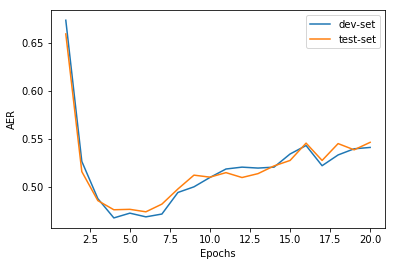

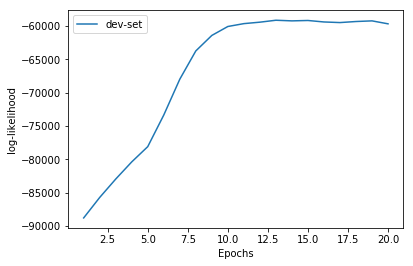

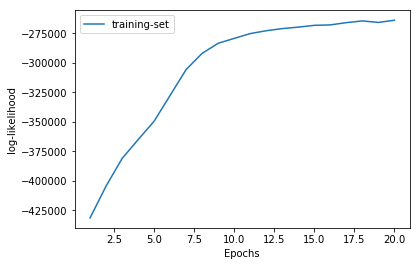

In [59]:
# results for 10k sentences
import matplotlib.pyplot as plt

handles = []
ax1 = plt.plot(range(1, len(dev_AERs)+1), dev_AERs, label='dev-set')
handles.extend(ax1)
ax2 = plt.plot(range(1, len(test_AERs)+1), test_AERs, label='test-set')
handles.extend(ax2)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('AER')
plt.show()
plt.clf()

handles = []
ax1 = plt.plot(range(1, len(train_likelihoods)+1), train_likelihoods, label='training-set')
handles.extend(ax1)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('log-likelihood')
plt.show()
plt.clf()

handles = []
ax1 = plt.plot(range(1, len(dev_likelihoods)+1), dev_likelihoods, label='dev-set')
handles.extend(ax1)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('log-likelihood')
plt.show()
plt.clf()

## Neural IBM1 withouth French context

For comparison purposes we include the results of the originial neural IBM1.

In [33]:
from neuralibm1 import NeuralIBM1Model
from neuralibm1trainer import NeuralIBM1Trainer

In [34]:
tf.reset_default_graph()


with tf.Session() as sess:

    # some hyper-parameters
    # tweak them as you wish
    batch_size=10  # on CPU, use something much smaller e.g. 1-16
    max_length=30
    lr = 0.001
    lr_decay = 0.0  # set to 0.0 when using Adam optimizer (default)
    emb_dim = 64
    mlp_dim = 128

    # our model
    model = NeuralIBM1Model(
        x_vocabulary=vocabulary_e, y_vocabulary=vocabulary_f, 
        batch_size=batch_size, emb_dim=emb_dim, mlp_dim=mlp_dim, session=sess)

    # our trainer
    trainer = NeuralIBM1Trainer(
        model, train_e_path, train_f_path, 
        dev_e_path, dev_f_path, dev_wa,
        test_e_path, test_f_path, test_wa,
        num_epochs=10, batch_size=batch_size, 
        max_length=max_length, lr=lr, lr_decay=lr_decay, session=sess,
        max_num=10000) # small training corpus just to make testing new code easier

    # now first TF needs to initialize all the variables
    print("Initializing variables..")
    sess.run(tf.global_variables_initializer())


    # now we can start training!
    print("Training started..")
    results = trainer.train()
    dev_AERs, test_AERs, train_likelihoods, dev_likelihoods = results

Training with B=10 max_length=30 lr=0.001 lr_decay=0.0
Initializing variables..
Training started..
Shuffling training data
Iter   100 loss 66.535721 accuracy 0.22 lr 0.001000
Iter   200 loss 58.521881 accuracy 0.22 lr 0.001000
Iter   300 loss 64.783844 accuracy 0.20 lr 0.001000
Iter   400 loss 43.832909 accuracy 0.24 lr 0.001000
Iter   500 loss 55.865246 accuracy 0.20 lr 0.001000
Iter   600 loss 69.351669 accuracy 0.21 lr 0.001000
Iter   700 loss 54.295448 accuracy 0.24 lr 0.001000
Epoch 1 loss 64.711381 accuracy 0.19 val_aer 0.65 val_acc 0.19
Computing training-set likelihood
Computing dev-set likelihood
Model saved in file: model.ckpt
Shuffling training data
Iter   100 loss 71.635216 accuracy 0.17 lr 0.001000
Iter   200 loss 75.882431 accuracy 0.16 lr 0.001000
Iter   300 loss 60.810463 accuracy 0.15 lr 0.001000
Iter   400 loss 70.482773 accuracy 0.22 lr 0.001000
Iter   500 loss 61.605980 accuracy 0.12 lr 0.001000
Iter   600 loss 56.401680 accuracy 0.22 lr 0.001000
Iter   700 loss 68.

### Plots

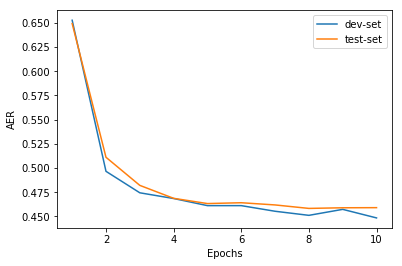

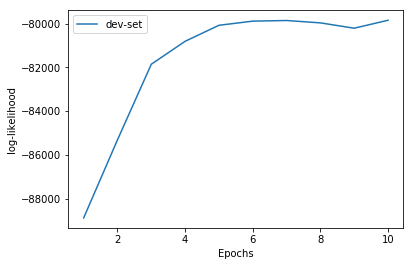

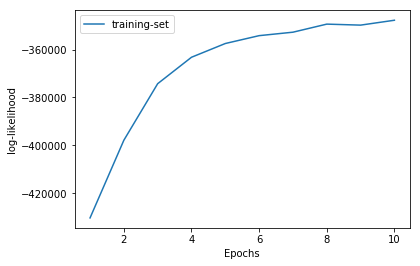

In [35]:
# plotting
import matplotlib.pyplot as plt

handles = []
ax1 = plt.plot(range(1, len(dev_AERs)+1), dev_AERs, label='dev-set')
handles.extend(ax1)
ax2 = plt.plot(range(1, len(test_AERs)+1), test_AERs, label='test-set')
handles.extend(ax2)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('AER')
plt.show()
plt.clf()

handles = []
ax1 = plt.plot(range(1, len(train_likelihoods)+1), train_likelihoods, label='training-set')
handles.extend(ax1)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('log-likelihood')
plt.show()
plt.clf()

handles = []
ax1 = plt.plot(range(1, len(dev_likelihoods)+1), dev_likelihoods, label='dev-set')
handles.extend(ax1)
plt.legend(handles=handles)
plt.xlabel('Epochs')
plt.ylabel('log-likelihood')
plt.show()
plt.clf()